In [23]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt


 Import Required Libraries

 Load the CSV File

In [24]:
from google.colab import files
files.upload()


Saving cyber_threat_dataset_250_samples.csv to cyber_threat_dataset_250_samples (1).csv


{'cyber_threat_dataset_250_samples (1).csv': b'Year,Attacker_IP,Target_IP,Location,Type_of_Attack,Device_of_Attack,Security_Type\n2020,93.233.131.112,192.168.152.119,Netherlands,Cryptojacking,IoT Device,MFA\n2018,56.252.2.168,192.168.157.66,Ukraine,AI-Powered Phishing,Web Server,Antivirus\n2019,39.199.128.189,192.168.174.201,Russia,Ransomware,IoT Device,Endpoint Security\n2017,113.4.11.15,192.168.237.166,Germany,Zero-Day Exploit,Mobile Device,User Awareness\n2021,201.4.36.23,192.168.57.126,Netherlands,Credential Stuffing,Voice Bot,WAF\n2021,200.189.200.43,192.168.162.30,USA,Phishing,Desktop,User Awareness\n2023,222.164.161.136,192.168.253.221,Global,SQL Injection,Botnet,User Awareness\n2025,40.148.85.191,192.168.126.194,Ukraine,API Abuse,Botnet,Endpoint Security\n2022,113.251.10.228,192.168.158.240,Iran,AI-Powered Phishing,Cloud VM,Backup & Recovery\n2023,129.42.17.245,192.168.181.84,USA,Credential Stuffing,Botnet,Firewall\n2016,129.63.221.68,192.168.50.225,India,Supply Chain Attack,Vo

In [25]:
df = pd.read_csv("cyber_threat_dataset_250_samples.csv")

# Display first 5 rows
df.head()


,Year,Attacker_IP,Target_IP,Location,Type_of_Attack,Device_of_Attack,Security_Type
0,2020,93.233.131.112,192.168.152.119,Netherlands,Cryptojacking,IoT Device,MFA
1,2018,56.252.2.168,192.168.157.66,Ukraine,AI-Powered Phishing,Web Server,Antivirus
2,2019,39.199.128.189,192.168.174.201,Russia,Ransomware,IoT Device,Endpoint Security
3,2017,113.4.11.15,192.168.237.166,Germany,Zero-Day Exploit,Mobile Device,User Awareness
4,2021,201.4.36.23,192.168.57.126,Netherlands,Credential Stuffing,Voice Bot,WAF


Basic Information About Dataset

In [26]:
print("Shape of dataset:", df.shape)
print("\nColumn names:")
print(df.columns)

print("\nDataset Info:")
df.info()


Shape of dataset: (250, 7)

Column names:
Index(['Year', 'Attacker_IP', 'Target_IP', 'Location', 'Type_of_Attack',
       'Device_of_Attack', 'Security_Type'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              250 non-null    int64 
 1   Attacker_IP       250 non-null    object
 2   Target_IP         250 non-null    object
 3   Location          250 non-null    object
 4   Type_of_Attack    250 non-null    object
 5   Device_of_Attack  250 non-null    object
 6   Security_Type     250 non-null    object
dtypes: int64(1), object(6)
memory usage: 13.8+ KB


Basic Data Cleaning

In [27]:
# Check for missing values
df.isnull().sum()


,0
Year,0
Attacker_IP,0
Target_IP,0
Location,0
Type_of_Attack,0
Device_of_Attack,0
Security_Type,0


In [28]:
# Remove duplicates if any
df = df.drop_duplicates()


Slice the Dataset

In [29]:
india_attacks = df[df["Location"] == "India"]
india_attacks.head()


,Year,Attacker_IP,Target_IP,Location,Type_of_Attack,Device_of_Attack,Security_Type
10,2016,129.63.221.68,192.168.50.225,India,Supply Chain Attack,Voice Bot,IDS
15,2020,134.220.174.110,192.168.252.183,India,DDoS,Desktop,IDS
18,2016,141.74.51.56,192.168.32.146,India,SQL Injection,IoT Device,Backup & Recovery
29,2019,133.145.175.42,192.168.173.67,India,API Abuse,Email Server,Firewall
31,2019,131.68.121.182,192.168.79.250,India,Brute Force,Voice Bot,IDS


In [30]:
recent_attacks = df[df["Year"] >= 2021]
recent_attacks.head()


,Year,Attacker_IP,Target_IP,Location,Type_of_Attack,Device_of_Attack,Security_Type
4,2021,201.4.36.23,192.168.57.126,Netherlands,Credential Stuffing,Voice Bot,WAF
5,2021,200.189.200.43,192.168.162.30,USA,Phishing,Desktop,User Awareness
6,2023,222.164.161.136,192.168.253.221,Global,SQL Injection,Botnet,User Awareness
7,2025,40.148.85.191,192.168.126.194,Ukraine,API Abuse,Botnet,Endpoint Security
8,2022,113.251.10.228,192.168.158.240,Iran,AI-Powered Phishing,Cloud VM,Backup & Recovery


Dice the Dataset

In [31]:
ddos_india = df[
    (df["Location"] == "India") &
    (df["Type_of_Attack"] == "DDoS")
]

ddos_india.head()


,Year,Attacker_IP,Target_IP,Location,Type_of_Attack,Device_of_Attack,Security_Type
15,2020,134.220.174.110,192.168.252.183,India,DDoS,Desktop,IDS
67,2022,134.107.61.89,192.168.62.22,India,DDoS,Botnet,IDS


Aggregation Analysis

In [32]:
yearly_attacks = df.groupby("Year").size().reset_index(name="Total_Attacks")
yearly_attacks


,Year,Total_Attacks
0,2016,19
1,2017,24
2,2018,30
3,2019,30
4,2020,12
5,2021,38
6,2022,25
7,2023,25
8,2024,26
9,2025,21


In [33]:
attack_type_count = df["Type_of_Attack"].value_counts()
attack_type_count


,count
Type_of_Attack,
Malware,26
Social Engineering,22
Supply Chain Attack,22
Brute Force,19
Cryptojacking,18
AI-Powered Phishing,18
SQL Injection,18
API Abuse,18
DDoS,18


In [34]:
location_attacks = df.groupby("Location").size().reset_index(name="Attack_Count")
location_attacks


,Location,Attack_Count
0,Brazil,21
1,China,21
2,Germany,19
3,Global,23
4,India,22
5,Iran,25
6,Netherlands,26
7,Nigeria,20
8,Russia,22
9,USA,26


Device Used for Attacks

In [35]:
device_usage = df["Device_of_Attack"].value_counts()
device_usage


,count
Device_of_Attack,
IoT Device,35
Botnet,34
API Gateway,33
Voice Bot,30
Desktop,27
Cloud VM,27
Email Server,23
Web Server,21
Mobile Device,20


Year-wise attacks (Bar Chart)

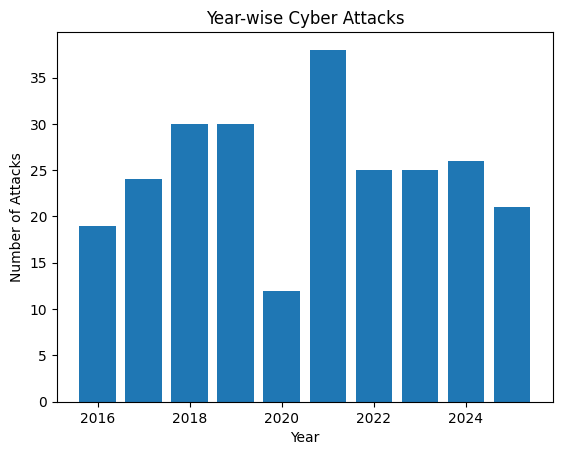

In [36]:
plt.figure()
plt.bar(yearly_attacks["Year"], yearly_attacks["Total_Attacks"])
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Year-wise Cyber Attacks")
plt.show()


Attack Type Distribution

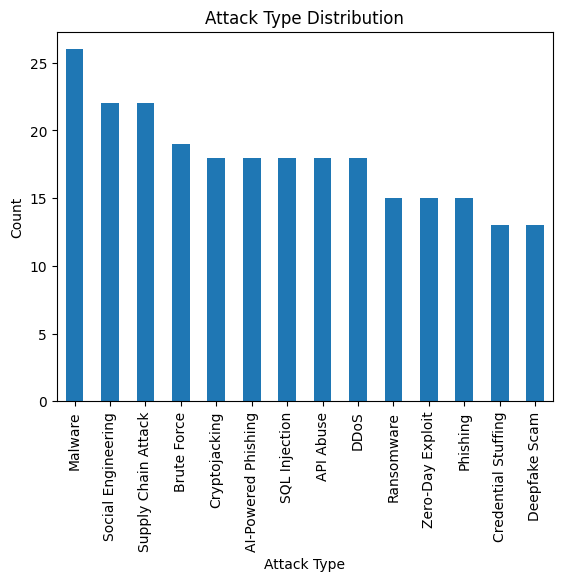

In [37]:
attack_type_count.plot(kind="bar")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Attack Type Distribution")
plt.show()


Year-wise Attack Trend (Line Chart)

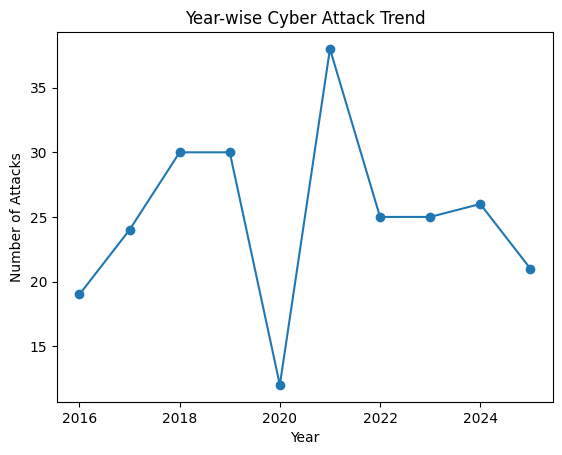

In [38]:
yearly_attacks = df.groupby("Year").size()

plt.figure()
plt.plot(yearly_attacks.index, yearly_attacks.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Year-wise Cyber Attack Trend")
plt.show()


Attack Type Distribution (Bar Chart)

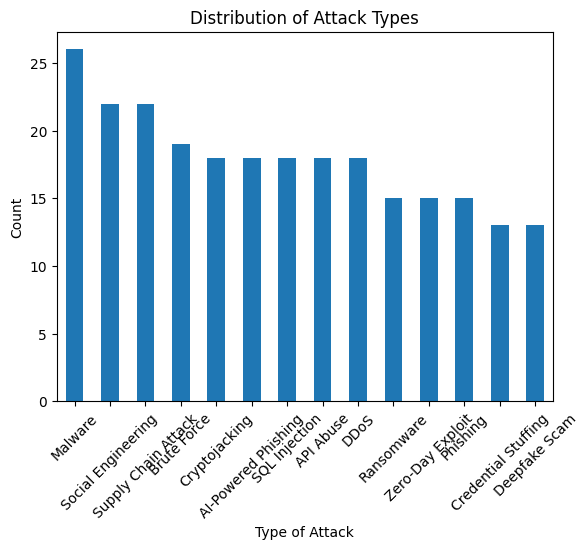

In [39]:
attack_types = df["Type_of_Attack"].value_counts()

plt.figure()
attack_types.plot(kind='bar')
plt.xlabel("Type of Attack")
plt.ylabel("Count")
plt.title("Distribution of Attack Types")
plt.xticks(rotation=45)
plt.show()


Country-wise Attacks (Horizontal Bar Chart)

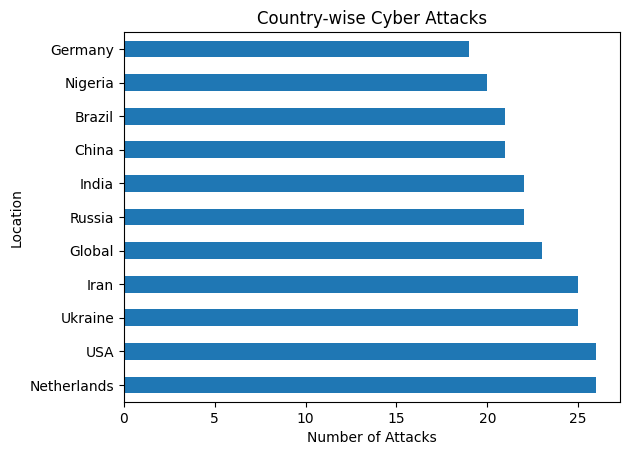

In [40]:
location_attacks = df["Location"].value_counts()

plt.figure()
location_attacks.plot(kind='barh')
plt.xlabel("Number of Attacks")
plt.ylabel("Location")
plt.title("Country-wise Cyber Attacks")
plt.show()


Location vs Attack Type (Heatmap-like Table)

In [41]:
location_attack = pd.crosstab(df["Location"], df["Type_of_Attack"])
location_attack


Type_of_Attack,AI-Powered Phishing,API Abuse,Brute Force,Credential Stuffing,Cryptojacking,DDoS,Deepfake Scam,Malware,Phishing,Ransomware,SQL Injection,Social Engineering,Supply Chain Attack,Zero-Day Exploit
Location,,,,,,,,,,,,,,
Brazil,3,1,1,0,2,2,1,4,0,0,3,2,2,0
China,0,1,0,1,1,3,0,5,2,1,1,1,4,1
Germany,1,2,1,1,1,1,1,3,1,1,2,2,0,2
Global,1,2,1,0,2,2,1,4,0,1,3,1,2,3
India,0,1,3,2,0,2,2,3,1,3,1,2,1,1
Iran,4,0,5,0,1,3,1,1,2,2,1,0,3,2
Netherlands,3,4,3,2,4,0,0,2,3,2,1,0,2,0
Nigeria,2,1,3,2,0,0,2,0,1,2,1,4,1,1
Russia,0,0,1,2,1,2,1,3,2,1,1,3,4,1


Top 5 Most Frequent Attacks (Pie Chart)

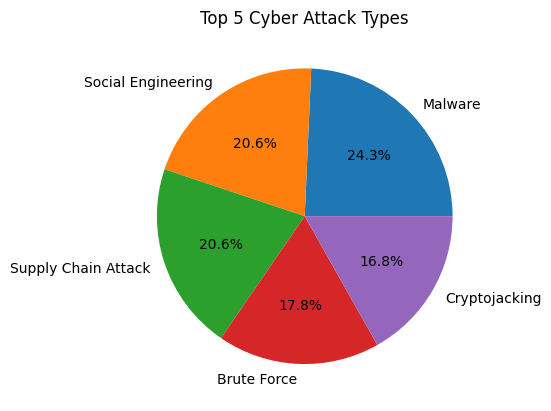

In [42]:
top_attacks = df["Type_of_Attack"].value_counts().head(5)

plt.figure()
top_attacks.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.title("Top 5 Cyber Attack Types")
plt.show()
